# Valorant Pros Data Analysis

In [1]:
# import required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read in the data file

valorant = pd.read_csv("ValorantPros.csv")

# Preview the dataset
valorant.head()

,player,damage_round,kdr,headshot,acs,first_bloods,clutches,vandal_phantom,fav_agent,num_matches,clutches_per_game,fb_per_game,ladder_position
0,100T Asuna,167.7,1.21,26.1,261.1,676,299,0,jett,194,1.541237,3.484536,1
1,tech,177.0,1.28,31.8,268.1,469,248,0,reyna,158,1.569620,2.968354,2
2,SoaR Zander,150.2,1.24,28.5,228.8,358,257,0,viper,186,1.381720,1.924731,3
3,johnqt,158.8,1.33,28.3,237.8,231,149,0,jett,116,1.284483,1.991379,4
4,C9 poiz,169.6,1.28,27.8,263.8,508,206,1,jett,150,1.373333,3.386667,5


In [3]:
# Set decimal point
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Summary Statistics
valorant.describe()

,damage_round,kdr,headshot,acs,first_bloods,clutches,vandal_phantom,num_matches,clutches_per_game,fb_per_game,ladder_position
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,151.424,1.118,27.028,228.796,368.020,215.350,0.230,147.710,1.461,2.430,50.500
std,11.555,0.102,4.387,20.397,216.130,81.260,0.423,54.133,0.147,0.783,29.011
min,122.700,0.830,18.300,185.900,116.000,91.000,0.000,65.000,1.089,0.991,1.000
25%,144.900,1.060,24.225,215.850,212.750,157.000,0.000,111.750,1.362,1.940,25.750
50%,149.350,1.110,26.700,225.650,312.500,199.500,0.000,136.500,1.445,2.259,50.500
75%,160.400,1.180,29.325,240.875,453.750,253.250,0.000,179.000,1.556,2.789,75.250
max,177.000,1.430,38.600,276.600,1219.000,491.000,1.000,300.000,1.831,4.615,100.000


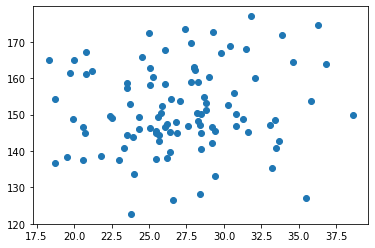

In [4]:
# Some preliminary graphs
valorant.sort_values(by=['kdr'], inplace=True)

plt.scatter(valorant.headshot, valorant.damage_round)

In [5]:
best_agent = valorant['fav_agent'].value_counts()
best_agent

jett       33
sova       17
astra      15
reyna      13
viper       8
skye        4
raze        3
kayo        2
cypher      2
yoru        1
killjoy     1
sage        1
Name: fav_agent, dtype: int64

In [6]:
best_weapon = valorant['vandal_phantom'].value_counts()
best_weapon

0    77
1    23
Name: vandal_phantom, dtype: int64

In [7]:
print(f"Most First Bloods Total: {valorant.loc[valorant['first_bloods'] == max(valorant.first_bloods), 'player'].item()}")
print(f"Most First Bloods Per Game: {valorant.loc[valorant['fb_per_game'] == max(valorant.fb_per_game), 'player'].item()}")
print(f"Highest Clutches Total: {valorant.loc[valorant['clutches'] == max(valorant.clutches), 'player'].item()}")
print(f"Highest Clutches Per Game: {valorant.loc[valorant['clutches_per_game'] == max(valorant.clutches_per_game), 'player'].item()}")
print(f"Highest K/D Ratio: {valorant.loc[valorant['kdr'] == max(valorant.kdr), 'player'].item()}")
print(f"Highest ACS: {valorant.loc[valorant['acs'] == max(valorant.acs), 'player'].item()}")
print(f"Highest Damage Per Round: {valorant.loc[valorant['damage_round'] == max(valorant.damage_round), 'player'].item()}")
print(f"Highest Headshot Percentage: {valorant.loc[valorant['headshot'] == max(valorant.headshot), 'player'].item()}")

Most First Bloods Total: BBG Governor
Most First Bloods Per Game: harmful
Highest Clutches Total: PROD
Highest Clutches Per Game: V1 nosyy
Highest K/D Ratio: TSM FTX WARDELL
Highest ACS: harmful
Highest Damage Per Round: tech
Highest Headshot Percentage: TSM FTX bang


# Question: Can you predict ladder position from these variables?

In [8]:
# Create separate variables for x and y
X = valorant[["headshot"]]
y = valorant["ladder_position"]

In [9]:
# Create the split, test data size will be 20% of the total dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
# Training dataset is 80% of the records in the airbnb dataframe
len(X_train)

80

In [11]:
# Testing dataset is 20% of the records in the airbnb dataframe
len(X_test)

20

In [12]:
clf = LinearRegression()

# Fits the training sets to the linear regression model we just initialized

clf.fit(X_train, y_train)

# Use the model to predict scores based on x_test

y_pred = clf.predict(X_test)

In [13]:
# Actual values of y_test
compare_y = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_y

,Actual,Predicted
43,44,48.019
75,76,47.666
91,92,48.096
53,54,48.047
42,43,47.908
80,81,47.707
85,86,48.414
87,88,47.929
96,97,48.137
67,68,48.123


In [14]:
# R^2 Coefficient of Determination value for our X variables.

headshot = clf.score(X_test, y_test)

In [15]:
# Create separate variables for x and y
X2 = valorant[["kdr"]]
y2 = valorant["ladder_position"]

# Create the split, test data size will be 20% of the total dataset.

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)

# Linear Regression Model

clf2 = LinearRegression()

# Fits the training sets to the linear regression model we just initialized

clf2.fit(X_train2, y_train2)

# Use the model to predict scores based on x_test

y_pred2 = clf2.predict(X_test2)

# R^2 Coefficient of Determination value for our X variables.

kdr = clf2.score(X_test2, y_test2)

In [16]:
# Create separate variables for x and y
X3 = valorant[["num_matches"]]
y3 = valorant["ladder_position"]

# Create the split, test data size will be 20% of the total dataset.

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2)

# Linear Regression Model

clf3 = LinearRegression()

# Fits the training sets to the linear regression model we just initialized

clf3.fit(X_train3, y_train3)

# Use the model to predict scores based on x_test

y_pred3 = clf3.predict(X_test3)

# R^2 Coefficient of Determination value for our X variables.

num_matches = clf3.score(X_test3, y_test3)

In [17]:
# Create separate variables for x and y
X4 = valorant[["acs"]]
y4 = valorant["ladder_position"]

# Create the split, test data size will be 20% of the total dataset.

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2)

# Linear Regression Model

clf4 = LinearRegression()

# Fits the training sets to the linear regression model we just initialized

clf4.fit(X_train4, y_train4)

# Use the model to predict scores based on x_test

y_pred4 = clf4.predict(X_test4)

# R^2 Coefficient of Determination value for our X variables.

acs = clf4.score(X_test4, y_test4)

In [18]:
print(f"Headshot: {headshot}")
print(f"ACS: {acs}")
print(f"KDR: {kdr}")
print(f"num_matches: {num_matches}")

Headshot: -0.19195816721892012
ACS: -0.36563442117994804
KDR: 0.21188288973989722
num_matches: -0.006463788421983363


# No.